In [1]:
import numpy as np
import matplotlib.pyplot as plt
from flowtracks.io import trajectories_ptvis

from tqdm import tqdm
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.colors import Normalize

In [2]:
inName = '../8000_20/res/ptv_is.%d'
trajects = trajectories_ptvis(inName, traj_min_len=15, xuap=False)


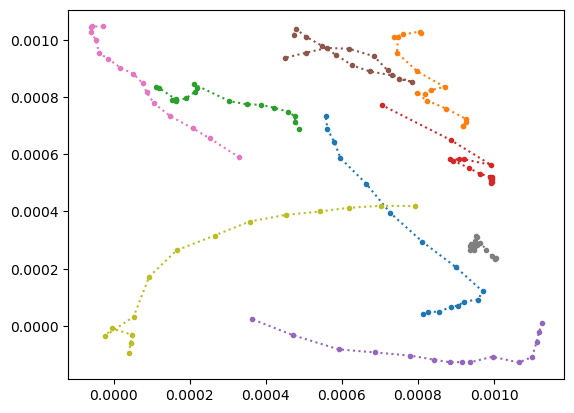

In [8]:
for traj in trajects:
	plt.plot(traj.pos()[:,0], traj.pos()[:,1], '.:')


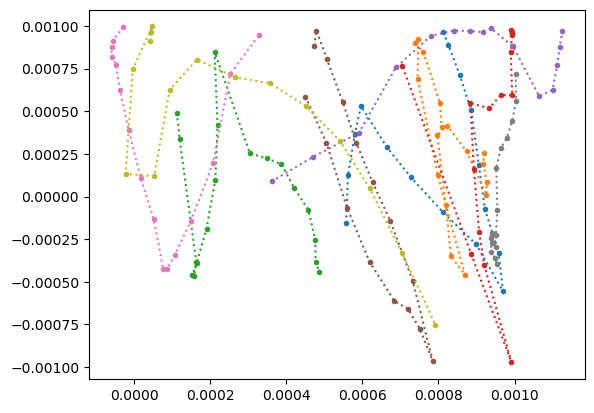

In [9]:
for traj in trajects:
	plt.plot(traj.pos()[:,0], traj.pos()[:,2], '.:')

In [10]:
allTracks = []
for tr in trajects:
    t = tr.time()[:-2]
    pos = tr.pos()[:-2]
    vel = tr.velocity()[:-2]
    acc = tr.accel()[:-2]
    # maxvel = max(np.linalg.norm(vel))
    allTracks.append( [t.tolist(), [row for row in pos], [row for row in vel], [row for row in acc]] )

# allTracks = list(zip(t,pos,vel,acc))

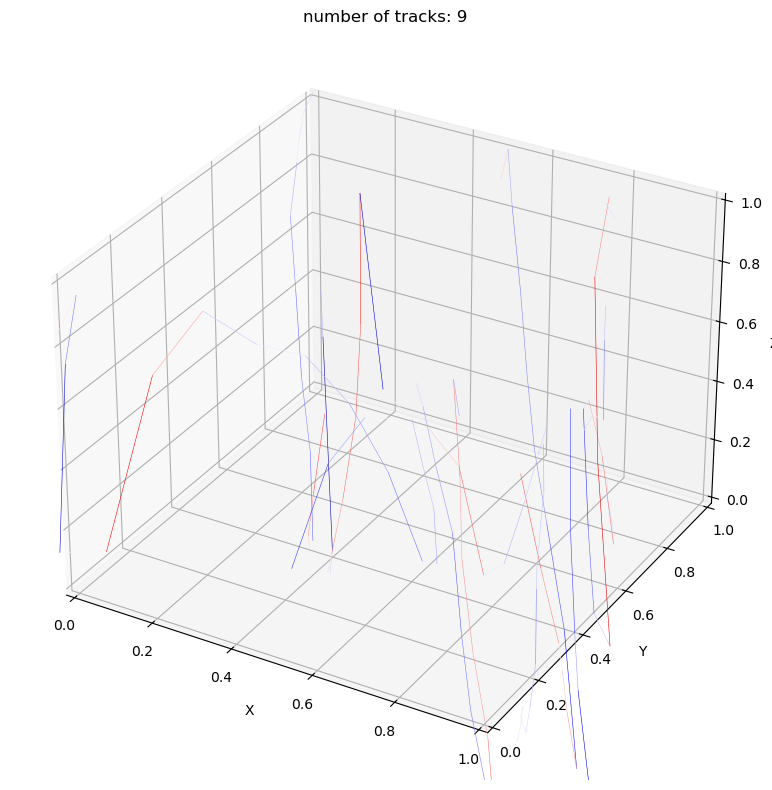

(None, None)

In [11]:
# def PlotTracks(allTracks,maxvel):
# plot tracks
maxvel = 0.001
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(111, projection='3d')
for track in tqdm(allTracks, desc='Plot tracks', position=0 , leave=True, delay=0.5):
    # for each track get the positions
    pos = np.asarray(track[1])
    x, y, z = pos[:,0], pos[:,1], pos[:,2]
    # load the velocitiy of the track and select the color as the vz velocity
    vel = np.asarray(track[2])
    color = vel[:,2]
    colorNorm = Normalize(-maxvel,maxvel)
    # define line segment
    points = np.array([x,y,z]).transpose().reshape(-1,1,3)*1000
    segs = np.concatenate([points[:-1],points[1:]],axis=1)
    lc = Line3DCollection(segs,cmap='seismic',norm=colorNorm,linewidths=0.4,alpha=1)
    lc.set_array(color) 
    # add the line segment to the figure
    axis.add_collection3d(lc)
axis.set_title('number of tracks: ' + str(len(allTracks)))
axis.set_xlabel('X'), axis.set_ylabel('Y'), axis.set_zlabel('Z')
plt.tight_layout(), plt.show()
    # save tracks
    # plt.savefig('alexTracks.png',dpi=200)